# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle

training_file = "train.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [3]:
### Replace each question mark with the appropriate value.

n_train     = len(X_train)
n_test      = len(X_test)
image_shape = X_train[0].shape 
n_classes   = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

Labels per each sign: [210, 2220, 2250, 1410, 1980, 1860, 420, 1440, 1410, 1470, 2010, 1320, 2100, 2160, 780, 630, 420, 1110, 1200, 210, 360, 330, 390, 510, 270, 1500, 600, 240, 540, 270, 450, 780, 240, 689, 420, 1200, 390, 210, 2070, 300, 360, 240, 240]
Biggest data set on sign: 2250
Smallest data set on sign: 210


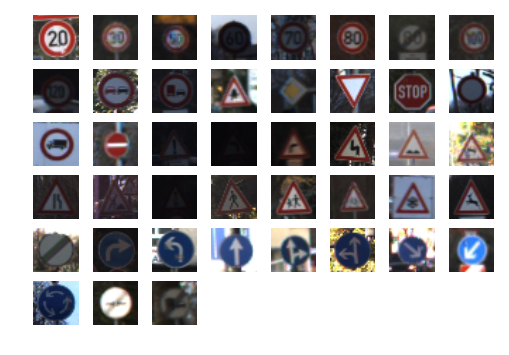

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random as rand
import cv2

# Visualizations will be shown in the notebook.
%matplotlib inline

def get_labelsizes_and_start_idx(label_list):
    ref_label=label_list[0]
    first_count = len([ class_id for class_id in label_list if class_id == ref_label ])
    labels=[]
    labels.append(first_count)
    sign_start_idx=[0]
    cnt=0
    for c_id in label_list:
        if ref_label != c_id:
            ref_label=c_id
            count = len([ class_id for class_id in label_list if class_id == c_id ])
            labels.append(count)
            sign_start_idx.append(cnt)
        cnt+=1
    return labels, sign_start_idx

labels, sign_start_idx = get_labelsizes_and_start_idx(train['labels'])
        
print("Labels per each sign:", labels)
big_dataset=max(labels)
small_dataset=min(labels)
print("Biggest data set on sign:", big_dataset)
print("Smallest data set on sign:", small_dataset)

for k, sign_idx in enumerate(sign_start_idx):
    image = train['features'][sign_idx+rand.randint(0,labels[k]-1)]
    plt.subplot(6,8,k+1), plt.imshow(image)
    plt.axis('off')


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

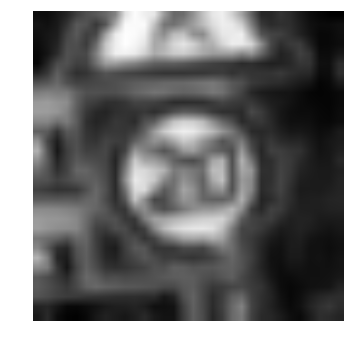

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def greyscale(list_imgs):
    result_imgs=np.copy(list_imgs)
    #print(list_imgs[0].shape)
    result_imgs=[ cv2.cvtColor(entry, cv2.COLOR_RGB2GRAY) for entry in list_imgs]
    plt.axis('off')
    plt.imshow(result_imgs[0], cmap="gray")
    for entry in result_imgs:
        entry.shape=(32,32,1)
    #print(result_imgs[0].shape)
    return result_imgs        

X_train_grey=greyscale(X_train)
# open compare to colored or normalized images

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
Applying greyscale conversion to all images as pointed out in paper gives better accuracy. Test with colors or normalizing channels is yet to be done to confirm the assumption. Whereby actually it is contradicting to some other results mentioned in paper.


In [5]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

# Would you pick remove validation from training set?
import random

def fill_up(features, labels, labels_per_each_sign, biggest_data, sign_start):
    x_data = []
    y_data = []
    for k, idx in enumerate(sign_start):
        size_label = labels_per_each_sign[k]
        diff       = biggest_data - size_label
        if diff > 0:
            for i in range(0, diff):
                x_data.append(features[idx+random.randint(0,size_label-1)])
                y_data.append(labels[idx])
    return x_data, y_data

def split_training_set(X_train, y_train, sign_start_list, label_list, percent=0.1):
    X_validation=[]
    y_validation=[]
    # taking 10% of each dataset
    to_delete=[]
    for k, sign_idx in enumerate(sign_start_list):
        # I have the feeling it is possible to do it just simple
        samples = int(label_list[k]*percent)
        indices = random.sample(range(0,samples),samples)
        for idx in indices:
            index=sign_idx + idx
            X_validation.append(X_train[index])
            y_validation.append(y_train[index])
            to_delete.append(index)
    X_train_pre=np.delete(X_train_grey,to_delete, axis=0)
    y_train_pre=np.delete(y_train,to_delete, axis=0)
    return X_validation, y_validation, X_train_pre, y_train_pre

def generate_training_set(X_data, y_data, sign_idx, labelsizes):
    print("Data size: ",len(X_data))
    #X_train_extra, y_train_extra = fill_up(X_train_grey, y_train, labels, big_dataset, sign_start_idx)
    X_validation, y_validation, X_train_new, y_train_new = split_training_set(X_data, y_data, sign_start_idx, labels)
    print("Validation size: ",len(X_validation))
    print("Labels size: ", len(y_validation))
    print("Training set size after extracting validation set: ", len(X_train_new))
    print("Labels set size after extracting validation set: ", len(y_train_new))

    labels_new, sign_start_idx_new = get_labelsizes_and_start_idx(y_train_new)
    print("Labels per each sign:", labels_new)
    X_train_extra, y_train_extra = fill_up(X_train_new, y_train_new, labels_new, max(labels_new), sign_start_idx_new)
    print("Training set extra: ", len(X_train_extra))
    print("Labels set extra: ", len(y_train_extra))
    X_train_pre = np.concatenate((X_train_new, X_train_extra), axis=0)
    y_train_pre = np.concatenate((y_train_new, y_train_extra), axis=0)
    return X_validation, y_validation, X_train_pre, y_train_pre

X_validation, y_validation, X_train_pre, y_train_pre = generate_training_set(X_train_grey, y_train, sign_start_idx, labels)
print("Training set size after fill up set: ", len(X_train_pre))
print("Labels set size after fill up set: ", len(y_train_pre))


Data size:  39209
Validation size:  3920
Labels size:  3920
Training set size after extracting validation set:  35289
Labels set size after extracting validation set:  35289
Labels per each sign: [189, 1998, 2025, 1269, 1782, 1674, 378, 1296, 1269, 1323, 1809, 1188, 1890, 1944, 702, 567, 378, 999, 1080, 189, 324, 297, 351, 459, 243, 1350, 540, 216, 486, 243, 405, 702, 216, 621, 378, 1080, 351, 189, 1863, 270, 324, 216, 216]
Training set extra:  51786
Labels set extra:  51786
Training set size after fill up set:  87075
Labels set size after fill up set:  87075


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
The training data is splitted to training set and validation set. From each sign 10% are extracted randomly for validation set.
No additional data was generated possibilities could have been rotation, make images blurry or to shift some pixels. Therefore we might gain some more possible real world scenarios covered. Nevertheless the training set was randomly filled to equal size of biggest data set.

In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

def LeNet(x, mu, sigma, classes):    
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = num classes.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

def network_tryout(x, mu, sigma, classes):    

    # conv I:32x32 O: 14x14x10
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 1, 10), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(10))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # activation
    conv1 = tf.nn.relu(conv1)
    
    # pooling I: 14x14x10 O: 7x7x10
    conv1 = tf.nn.avg_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # flatten I: 7x7x10 O: 490
    fc0   = flatten(conv1)

    # fullycon I: 490 O: 120
    fc1_W = tf.Variable(tf.truncated_normal(shape=(490, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    # activation
    fc2    = tf.nn.relu(fc1)

    # fullycon I: 120 O: classes
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(120, classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    return logits

def evaluate(X_data, y_data, batch_size):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
The architecture is basically the solution provided in LeNet lab described in code cell above. Only last fully connected layer output was adjusted to the number of classes of signs.

In [13]:
### Train your model here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

# more infos https://www.tensorflow.org/api_docs/python/nn/
# https://www.tensorflow.org/api_docs/python/train/

EPOCHS     = 15
# based on dataset size 87075
BATCH_SIZE = 140
RATE       = 0.001
# Hyperparameters
MU         = 0
SIGMA      = 0.1

# input variables
x         = tf.placeholder(tf.float32, (None, 32, 32, 1))
y         = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

#logits = network_tryout(x, MU, SIGMA, n_classes)
logits = LeNet(x, MU, SIGMA, n_classes)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
# try out - several optimizers to choose 
# https://www.tensorflow.org/api_docs/python/train/optimizers#Optimizer
# https://www.quora.com/Which-optimizer-in-TensorFlow-is-best-suited-for-learning-regression

#global_step = tf.Variable(0, trainable=False)
#starter_learning_rate = 0.001
#learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
#                                           EPOCHS, 0.96, staircase=True)

#optimizer = tf.train.GradientDescentOptimizer(learning_rate)
optimizer = tf.train.AdamOptimizer(learning_rate = RATE)

#training_operation = optimizer.minimize(loss_operation, global_step=global_step)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_pre)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        print()
        print("-- some new data start --")
        X_validation, y_validation, X_train_pre, y_train_pre = generate_training_set(X_train_grey, y_train, sign_start_idx, labels)
        X_train_pre, y_train_pre = shuffle(X_train_pre, y_train_pre)
        print("-- some new data end --")
        print()
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_pre[offset:end], y_train_pre[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation, BATCH_SIZE)
        print()
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'model')
    print("Model saved")

Training...


-- some new data start --
Data size:  39209
Validation size:  3920
Labels size:  3920
Training set size after extracting validation set:  35289
Labels set size after extracting validation set:  35289
Labels per each sign: [189, 1998, 2025, 1269, 1782, 1674, 378, 1296, 1269, 1323, 1809, 1188, 1890, 1944, 702, 567, 378, 999, 1080, 189, 324, 297, 351, 459, 243, 1350, 540, 216, 486, 243, 405, 702, 216, 621, 378, 1080, 351, 189, 1863, 270, 324, 216, 216]
Training set extra:  51786
Labels set extra:  51786
-- some new data end --


EPOCH 1 ...
Validation Accuracy = 0.775


-- some new data start --
Data size:  39209
Validation size:  3920
Labels size:  3920
Training set size after extracting validation set:  35289
Labels set size after extracting validation set:  35289
Labels per each sign: [189, 1998, 2025, 1269, 1782, 1674, 378, 1296, 1269, 1323, 1809, 1188, 1890, 1944, 702, 567, 378, 999, 1080, 189, 324, 297, 351, 459, 243, 1350, 540, 216, 486, 243, 405, 702, 216, 621, 378, 

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
Training was done with 15 epochs and learning rate of 0.001 where higher epochs did not show segnificant improve in connection to lower learning rate. The batch size is choosen based on data size so that last batch holds enough data. Furthermore data was regenerated and shuffled during training to gain more generalized training.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
The choosen architecture is LeNet. The network breaks down the learning of features and samples from layer to layer more fine granular features of signs. Several other networks would be sufficient as well like GoogleNet or AlexNet.
Besides this the LeNet paper results are showing accurracy of 99% which is good for this problem. This model does not achieve this accuracy due to lack of additional data generation.

### Model test with existing test set

In [14]:
# Run test
import tensorflow as tf

X_test_grey=np.copy(X_test)
X_test_grey=[ cv2.cvtColor(entry, cv2.COLOR_RGB2GRAY) for entry in X_test]
for entry in X_test_grey:
    entry.shape=(32,32,1)

saver = tf.train.Saver()

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_grey, y_test, BATCH_SIZE)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.906


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

Choosen images


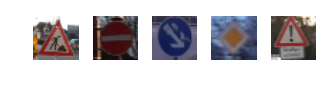

In [5]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import pickle

# preconfigured images taken with own smartphone and transformed with tranform_img.py script
testing_file = "my_test.p"

with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
#print("Original image")
#for k, image in enumerate(test['orig']):
#    plt.subplot(6,8,k+1), plt.imshow(image)

resized=test['resized'];

#X_test=[resized[10]]
X_test=[resized[0],resized[5],resized[7],resized[8],resized[10]]
#y_test=[18]
y_test=[25,17,38,12,18]

print("Choosen images")
for k, image in enumerate(X_test):
    plt.subplot(6,8,k+1), plt.imshow(image)
    plt.axis('off')

resized=[ cv2.cvtColor(entry, cv2.COLOR_RGB2GRAY) for entry in resized]
for entry in resized:
    entry.shape=(32,32,1)

X_test=[resized[0],resized[5],resized[7],resized[8],resized[10]]


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** 
Some difficulties are day/night conditions, light reflection, perspective, too blurry, bad resolution, detecting signs in big distance, stickers on sign like the keep right sign. 


In [16]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

saver = tf.train.Saver()

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test, BATCH_SIZE)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.800


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

The accuracy ist 80%. Only the "general caution" sign was not recognized. The result is below the accuracy of test 90% which is hard to compare with data set of 5 signs. Considering the last sign without text would end up in 100% but would not reflect the accuracy of the model.

In [17]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
#print(correct_prediction)
import tensorflow as tf

saver = tf.train.Saver()

softmax=tf.nn.softmax(logits)
pred=tf.nn.top_k(softmax, 8)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    out = sess.run(pred, feed_dict= {x: X_test})
    print(out)

TopKV2(values=array([[  1.00000000e+00,   5.59862308e-19,   5.74688771e-20,
          1.60417236e-20,   7.11290307e-22,   3.74316418e-22,
          9.07185750e-23,   6.08136027e-24],
       [  1.00000000e+00,   7.02622379e-12,   1.02530501e-15,
          5.46444495e-20,   4.89560674e-20,   4.81200980e-20,
          3.42643057e-20,   2.43787191e-21],
       [  1.00000000e+00,   3.18150367e-12,   5.35420232e-14,
          5.22620345e-14,   1.91583335e-14,   6.59209956e-15,
          5.70382185e-19,   1.84098860e-21],
       [  1.00000000e+00,   1.91472380e-13,   1.44957949e-14,
          8.78232305e-15,   1.49698610e-15,   9.99256415e-16,
          8.74671103e-16,   1.21808954e-17],
       [  9.99999404e-01,   5.61817615e-07,   2.47960830e-09,
          3.03645889e-12,   4.55337862e-13,   3.43527324e-14,
          4.42991032e-16,   1.49229775e-16]], dtype=float32), indices=array([[25,  5, 38,  1,  2, 12, 28,  0],
       [17, 14,  1,  0,  4, 31, 10, 34],
       [38, 41, 23, 10, 20, 34, 36

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
The model was certain about the "road work", "no entry", "keep right" and "priority road" sign even the "keep right" sign has some obstractions on it. Last but not least the "general caution" sing additionally with some text below was only predicted with k=8. This is probably caused by the poor quality of the image and confusion by the text label.  

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.